### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [4]:
"""
STEP 3: Environment Setup
Load API credentials securely from environment variables.
"""

import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get Google API key with error handling
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
if not GOOGLE_API_KEY:
    raise ValueError("GOOGLE_API_KEY not found in environment variables")

print("✓ API keys loaded successfully")

✓ API keys loaded successfully


In [5]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings, ChatGoogleGenerativeAI

embedding_model = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
)


# Initialize Google's Gemini model for response generation
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",    # Latest fast Gemini model for quick reranking
    temperature=0,               # Deterministic output for consistency in ranking
    max_tokens=None,            # Use model default token limit
    timeout=None,               # No timeout limit for ranking requests
    max_retries=2,              # Retry failed requests twice
)

print("✓ Gemini model initialized for reranking")

✓ Gemini model initialized for reranking


/home/bjit/Desktop/Storage01/SelfDevelopment/Rag_Course/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### We Will start With Creating Nodes

In [6]:
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

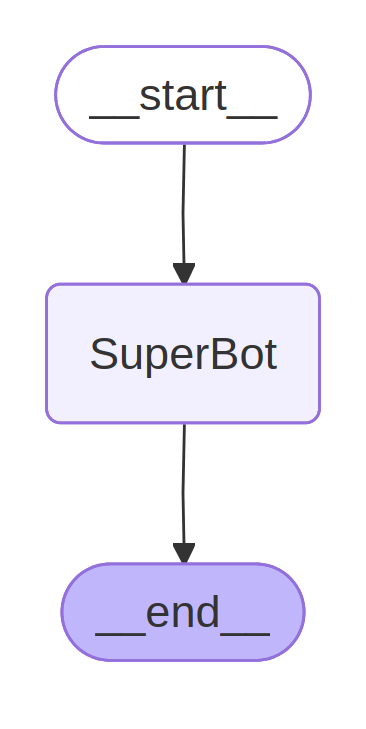

In [7]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langchain_core.runnables.graph import MermaidDrawMethod 

import nest_asyncio
nest_asyncio.apply()

graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)))

In [8]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Saib & I love to play football."})

{'messages': [HumanMessage(content='Hi,My name is Saib & I love to play football.', additional_kwargs={}, response_metadata={}, id='e0e84e33-0716-4d27-9945-5707f0477198'),
  AIMessage(content="Hi Saib! It's great to meet you! Football is awesome. What position do you play? Do you have a favorite team or player?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--f87956ed-4aa1-4dd9-b4ac-47096ce8ad56-0', usage_metadata={'input_tokens': 14, 'output_tokens': 32, 'total_tokens': 46, 'input_token_details': {'cache_read': 0}})]}

#### Streaming The responses

In [9]:
for event in graph_builder.stream({"messages":"Hello My name is Saib."}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hello Saib, it's nice to meet you! How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--35ce83b6-27c5-48ae-9134-81f81c22df4f-0', usage_metadata={'input_tokens': 7, 'output_tokens': 20, 'total_tokens': 27, 'input_token_details': {'cache_read': 0}})]}}
